In [554]:
Path("{}/newhybrids".format(results_dir)).mkdir(parents=True, exist_ok=True)
os.chdir("{}/newhybrids".format(results_dir))

In [559]:
pca_df=pd.read_csv("{}/pca/pca_df.csv".format(results_dir), sep=",")

all_samples = pca_df.loc[pca_df["pca_species"].isin(["s_haematobium", "s_bovis"]), "sample_name"]
np.savetxt("samples.list", all_samples, delimiter=',', fmt="%s")           

In [ ]:
#read ref samples to an array (from ADM analyses above)
sh_ref_samples = np.genfromtxt(f"{results_dir}/admixture/sh_ref.list", delimiter=',', dtype=str)
sb_ref_samples = np.genfromtxt(f"{results_dir}/admixture/sb_ref.list", delimiter=',', dtype=str)

#get ac counts from each ref pop
sh_ref_sample_idxs = [samples.index(ref_sample) for ref_sample in sh_ref_samples]
sb_ref_sample_idxs = [samples.index(ref_sample) for ref_sample in sb_ref_samples]

In [ ]:
%%bash

#remove sites gtd in less than 50% of samples
conda run -n popstructure --cwd . --live-stream \
    vcftools \
        --vcf ../hybrid_index/fst_eq_1_unphased.vcf\
        --keep samples.list \
        --missing-site \
        --stdout \
        >missing_per_site.tbl

cat missing_per_site.tbl \
    | sed 1d \
    | awk '{if ($6<=0.10) print $0}' \
    >high_freq_gt_sites.list

conda run -n popstructure --cwd . --live-stream \
    vcftools \
        --vcf ../hybrid_index/fst_eq_1_unphased.vcf\
        --positions high_freq_gt_sites.list \
        --recode \
        --recode-INFO-all \
        --stdout \
        >high_freq_gt_sites_fst_eq_1.vcf


In [562]:
%%bash

conda run -n popstructure --cwd . --live-stream \
    vcftools \
        --vcf high_freq_gt_sites_fst_eq_1.vcf \
        --maf 0.05 \
        --recode \
        --recode-INFO-all \
        --stdout \
        >high_freq_gt_sites_fst_eq_1_maf05.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf high_freq_gt_sites_fst_eq_1.vcf
	--recode-INFO-all
	--maf 0.05
	--recode
	--stdout

After filtering, kept 166 out of 166 Individuals
Outputting VCF file...
After filtering, kept 621131 out of a possible 621134 Sites
Run Time = 316.00 seconds


In [563]:
%%bash

conda run -n popstructure --cwd . --live-stream \
    plink \
        --vcf high_freq_gt_sites_fst_eq_1_maf05.vcf \
        --allow-extra-chr \
        --double-id \
        --indep-pairwise 25 5 0.20 \
        --out high_freq_gt_sites_fst_eq_1_maf05_ld_filtered

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to high_freq_gt_sites_fst_eq_1_maf05_ld_filtered.log.
Options in effect:
  --allow-extra-chr
  --double-id
  --indep-pairwise 25 5 0.20
  --out high_freq_gt_sites_fst_eq_1_maf05_ld_filtered
  --vcf high_freq_gt_sites_fst_eq_1_maf05.vcf

1031287 MB RAM detected; reserving 515643 MB for main workspace.
--vcf: high_freq_gt_sites_fst_eq_1_maf05_ld_filtered-temporary.bed +
high_freq_gt_sites_fst_eq_1_maf05_ld_filtered-temporary.bim +
high_freq_gt_sites_fst_eq_1_maf05_ld_filtered-temporary.fam written.
621131 variants loaded from .bim file.
166 people (0 males, 0 females, 166 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
high_freq_gt_sites_fst_eq_1_maf05_ld_filtered.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 166 founders and 0 nonfounders present.
Calculating allele f

In [564]:
%%bash

conda run -n popstructure --cwd . --live-stream \
    vcftools \
        --vcf high_freq_gt_sites_fst_eq_1_maf05.vcf \
        --exclude high_freq_gt_sites_fst_eq_1_maf05_ld_filtered.prune.out \
        --recode \
        --recode-INFO-all \
        --stdout \
        >high_freq_gt_sites_fst_eq_1_maf05_ld_filtered.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf high_freq_gt_sites_fst_eq_1_maf05.vcf
	--recode-INFO-all
	--recode
	--exclude high_freq_gt_sites_fst_eq_1_maf05_ld_filtered.prune.out
	--stdout

After filtering, kept 166 out of 166 Individuals
Outputting VCF file...
After filtering, kept 15288 out of a possible 621131 Sites
Run Time = 10.00 seconds


## autosomes

In [565]:
%%bash

conda run -n popstructure --cwd . --live-stream \
    vcftools \
        --vcf high_freq_gt_sites_fst_eq_1_maf05_ld_filtered.vcf \
        --not-chr NC_067195.1 \
        --recode \
        --recode-INFO-all \
        --stdout \
        >high_freq_gt_sites_fst_eq_1_maf05_ld_filtered_autosomes.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf high_freq_gt_sites_fst_eq_1_maf05_ld_filtered.vcf
	--not-chr NC_067195.1
	--recode-INFO-all
	--recode
	--stdout

After filtering, kept 166 out of 166 Individuals
Outputting VCF file...
After filtering, kept 15288 out of a possible 15288 Sites
Run Time = 9.00 seconds


In [596]:
%%bash

N_SNVS=250

conda run -n popstructure --cwd . --live-stream \
    vcftools \
        --vcf high_freq_gt_sites_fst_eq_1_maf05_ld_filtered_autosomes.vcf \
        --thin 500000 \
        --recode \
        --recode-INFO-all \
        --stdout \
        >newhybrids.vcf


grep -v "#" high_freq_gt_sites_fst_eq_1_maf05_ld_filtered_autosomes_thinned500k.vcf | cut -f1,2 | shuf | shuf | shuf | head -n ${N_SNVS} >randomly_sampled_pos.list

conda run -n popstructure --cwd . --live-stream \
    vcftools \
        --vcf high_freq_gt_sites_fst_eq_1_maf05_ld_filtered_autosomes_thinned500k.vcf \
        --positions randomly_sampled_pos.list \
        --recode \
        --recode-INFO-all \
        --stdout \
        >newhybrids.vcf



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf high_freq_gt_sites_fst_eq_1_maf05_ld_filtered_autosomes.vcf
	--recode-INFO-all
	--thin 500000
	--recode
	--stdout

After filtering, kept 166 out of 166 Individuals
Outputting VCF file...
After filtering, kept 558 out of a possible 15288 Sites
Run Time = 0.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf high_freq_gt_sites_fst_eq_1_maf05_ld_filtered_autosomes_thinned500k.vcf
	--recode-INFO-all
	--positions randomly_sampled_pos.list
	--recode
	--stdout

After filtering, kept 166 out of 166 Individuals
Outputting VCF file...
After filtering, kept 250 out of a possible 558 Sites
Run Time = 0.00 seconds


In [597]:
vcf_file = "newhybrids.vcf"
vcf = VCF(vcf_file)

# Extract sample names and genotypes
samples = vcf.samples

In [598]:
#read ref samples to an array (from ADM analyses above)
sh_ref_samples = np.genfromtxt(f"{results_dir}/admixture/sh_ref.list", delimiter=',', dtype=str)
sb_ref_samples = np.genfromtxt(f"{results_dir}/admixture/sb_ref.list", delimiter=',', dtype=str)

#get ac counts from each ref pop
sh_ref_sample_idxs = [samples.index(ref_sample) for ref_sample in sh_ref_samples]
sb_ref_sample_idxs = [samples.index(ref_sample) for ref_sample in sb_ref_samples]

zs=[]

for sample in samples:
    if sample in sh_ref_samples:
        zs.append("z0")
    elif sample in sb_ref_samples:
        zs.append("z1")
    else:
        zs.append("")

In [599]:
import pandas as pd
from cyvcf2 import VCF

# Read the VCF file
vcf_file = "newhybrids.vcf"
vcf = VCF(vcf_file)

# Extract sample names and genotypes
sample_names = vcf.samples
genotype_data = [row.genotypes for row in vcf]

vcf = VCF(vcf_file)
snp_ids = [record.ID for record in vcf]

# Convert genotypes to NewHybrids format
converted_genotypes = []

for row in genotype_data:
    converted_row = []
    for genotype in row:
        if genotype[0] == -1 or genotype[1] == -1:
            converted_row.append("0")
        else:
            converted_row.append(f"{genotype[0]+1}{genotype[1]+1}")
    converted_genotypes.append(converted_row)

# Transpose the genotype matrix
converted_genotypes = list(map(list, zip(*converted_genotypes)))

# Save the converted genotypes as a NewHybrids input file
with open("newhybrids_input.txt", "w") as f:
    # Write the header
    f.write(f"NumIndivs {len(sample_names)}\n")
    f.write(f"NumLoci {len(snp_ids)}\n")
    f.write("Digits 1\n")
    f.write("Format Lumped\n")
    
    # Write locus names
    f.write("LocusNames " + " ".join(snp_ids) + "\n")
    
    # Write the genotype data
    for i, row in enumerate(converted_genotypes, start=1):
        f.write(str(i) + "\t" + zs[i-1]  + "\t"  + "\t".join(row) + "\n")


In [600]:
!cat gtypefreq.txt

12
Pure_0	1	0	0	0
Pure_1	0	0	0	1
F1	0	0.5	0.5	0
F2	0.25	0.25	0.25	0.25
0_Bx1	0.5	0.25	0.25	0
1_Bx1	0	0.25	0.25	0.5
0_Bx2	0.75	0.125	0.125	0
1_Bx2	0	0.125	0.125	0.75
0_Bx3	0.875	0.0625	0.0625	0
1_Bx3	0	0.0625	0.0625	0.875
0_Bx4	0.9375	0.03125	0.03125	0
1_Bx4	0	0.03125	0.03125	0.9375



In [ ]:
../../bin/newhybrids/newhybrids-no-gui-linux.exe --no-gui -c gtypefreq.txt -d newhybrids_input.txt --burn-in 250000 --num-sweeps 750000 --seeds 12345 54321

# Examine genetic clines

In [1]:
import os
import allel
import numpy as np
import pandas as pd

from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
# from collections import defaultdict
# from haversine import haversine
# from IPython.display import Image 
# from itertools import combinations
# from itertools import groupby
# from matplotlib import cm
# from matplotlib.colors import ListedColormap
# from pykrige.ok import OrdinaryKriging
# from scipy.stats import ttest_ind
# from skbio.stats.distance import mantel
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from tqdm import tqdm
# import cartopy.crs as ccrs
# import cartopy.feature as cf
# import glob
# import matplotlib.lines as mlines
# import matplotlib.patches as mpatches
# import multiprocessing as mp
# import random
# import scipy
# import statistics
# import time
# import vcf

In [3]:
proj_dir="/master/nplatt/sch_hae_scan"
results_dir="{}/results".format(proj_dir)

os.chdir(proj_dir)

In [4]:
Path("{}/clines".format(results_dir)).mkdir(parents=True, exist_ok=True)
os.chdir("{}/clines".format(results_dir))

## Prep VCF file

- LD filter
- Autosomes

In [ ]:
%%bash

conda run -n scan-clines --cwd . --live-stream \
    vcftools \
        --vcf ../filter_genotypes/sorted_annotated_snps.vcf \
        --chr NC_067196.1 \
        --chr NC_067197.1 \
        --chr NC_067198.1 \
        --chr NC_067199.1 \
        --chr NC_067200.1 \
        --chr NC_067201.1 \
        --chr NC_067202.1 \
        --recode \
        --recode-INFO-all \
        --out autosomes


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../filter_genotypes/sorted_annotated_snps.vcf
	--chr NC_067196.1
	--chr NC_067197.1
	--chr NC_067198.1
	--chr NC_067199.1
	--chr NC_067200.1
	--chr NC_067201.1
	--chr NC_067202.1
	--recode-INFO-all
	--out autosomes
	--recode

After filtering, kept 171 out of 171 Individuals
Outputting VCF file...


In [ ]:
%%bash

conda run -n scan-clines --cwd . --live-stream \
    plink \
        --vcf autosomes_maf05.recode.vcf \
        --allow-extra-chr \
        --double-id \
        --indep-pairwise 25 5 0.20 \
        --out ld

In [ ]:
%%bash

conda run -n scan-clines --cwd . --live-stream \
    vcftools \
        --vcf autosomes_maf05.recode.vcf \
        --exclude ld.prune.out \
        --recode \
        --recode-INFO-all \
        --out mantel

## Calculate genetic distances 
calculated wtih `VCF2Dis` from https://github.com/BGI-shenzhen/VCF2Dis.  Cloned into `sch_hae_scan/bin`

In [191]:
#get the genetic data
vcf_reader = vcf.Reader(open('mantel.vcf', 'r'))
#get the sample order
samples=vcf_reader.samples

In [ ]:
%%bash

~/sch_hae_scan/bin/VCF2Dis/bin/VCF2Dis -InPut smantelh.vcf -OutPut mantel_p_distance.tsv

In [209]:
#read in distance matrix
gen_df = pd.read_table("mantel_p_distance.tsv", sep="\t", header=None, index_col=0, skiprows=[0])

#VCF2Dis only keeps the first 20 chars in the sample name... so need to re-header
gen_df.index=samples
gen_df.columns=samples
gen_df.to_csv("mantel_p_distance.csv", sep=",")
gen_df

,Sb_NG_au_1.2,Sb_NG_au_2.10,Sb_NG_au_2.13,Sb_NG_au_2.5,Sb_NG_au_2.6,Sb_NG_be_1.10,Sb_NG_be_1.3,Sb_NG_be_1.5,Sb_NG_en_1.1,Sh_NG_eb_6_2,...,ssp_cdivoire_raviart_99,ssp_niger_libore_156,ssp_niger_libore_157,ssp_niger_libore_159,ssp_niger_libore_165,ssp_niger_libore_166,ssp_niger_libore_167,ssp_niger_libore_168,ssp_niger_libore_169,ssp_zambia_kafue_71
Sb_NG_au_1.2,0.000000,0.131414,0.130567,0.123673,0.133479,0.138487,0.138047,0.139565,0.137195,0.607656,...,0.673802,0.677792,0.687424,0.686113,0.690534,0.682677,0.686049,0.682013,0.682106,0.711361
Sb_NG_au_2.10,0.131414,0.000000,0.133060,0.125256,0.131524,0.138589,0.138525,0.139375,0.137232,0.605154,...,0.671416,0.675978,0.685582,0.685096,0.689279,0.680746,0.684091,0.680638,0.680312,0.709620
Sb_NG_au_2.13,0.130567,0.133060,0.000000,0.123730,0.131377,0.137550,0.137009,0.138607,0.136884,0.607040,...,0.673536,0.677319,0.687281,0.686922,0.690918,0.682147,0.685731,0.682445,0.681987,0.711162
Sb_NG_au_2.5,0.123673,0.125256,0.123730,0.000000,0.124462,0.129912,0.129845,0.131333,0.130144,0.604908,...,0.671399,0.675360,0.684936,0.684015,0.688549,0.680483,0.683658,0.680221,0.679980,0.710109
Sb_NG_au_2.6,0.133479,0.131524,0.131377,0.124462,0.000000,0.137950,0.139023,0.139497,0.136131,0.606011,...,0.672750,0.676290,0.686568,0.685338,0.690063,0.680987,0.684277,0.681226,0.681008,0.710233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ssp_niger_libore_166,0.682677,0.680746,0.682147,0.680483,0.680987,0.675128,0.676105,0.675591,0.674796,0.171413,...,0.122009,0.089942,0.098590,0.084684,0.090068,0.000000,0.097598,0.089012,0.089984,0.109387
ssp_niger_libore_167,0.686049,0.684091,0.685731,0.683658,0.684277,0.678250,0.679304,0.679045,0.678591,0.181795,...,0.118892,0.104165,0.088729,0.095421,0.087935,0.097598,0.000000,0.101232,0.098020,0.097215
ssp_niger_libore_168,0.682013,0.680638,0.682445,0.680221,0.681226,0.674857,0.675725,0.676202,0.674472,0.169057,...,0.124545,0.096090,0.098624,0.087778,0.093256,0.089012,0.101232,0.000000,0.085708,0.108372
ssp_niger_libore_169,0.682106,0.680312,0.681987,0.679980,0.681008,0.674412,0.675636,0.675341,0.674373,0.170109,...,0.123967,0.094921,0.096624,0.089336,0.095068,0.089984,0.098020,0.085708,0.000000,0.104821


## Get geo distances

In [210]:
km_dists=np.array([])
for s1 in samples:
    s1_lat=info_df.loc[info_df["sample_name"] == s1]["lat"].values[0]
    s1_lon=info_df.loc[info_df["sample_name"] == s1]["lon"].values[0]
    
    for s2 in samples:
        s2_lat=info_df.loc[info_df["sample_name"] == s2]["lat"].values[0]
        s2_lon=info_df.loc[info_df["sample_name"] == s2]["lon"].values[0]
        
        km_dists=np.append(km_dists, haversine((s1_lat, s1_lon), (s2_lat, s2_lon)))
        
#reshape into a 2d matrix
km_dists.shape=(len(samples), len(samples))

#convert to a df
km_df=pd.DataFrame(data=km_dists, columns=samples, index=samples)
km_df.to_csv("mantel_geo_distance.csv", sep=",")
km_df

,Sb_NG_au_1.2,Sb_NG_au_2.10,Sb_NG_au_2.13,Sb_NG_au_2.5,Sb_NG_au_2.6,Sb_NG_be_1.10,Sb_NG_be_1.3,Sb_NG_be_1.5,Sb_NG_en_1.1,Sh_NG_eb_6_2,...,ssp_cdivoire_raviart_99,ssp_niger_libore_156,ssp_niger_libore_157,ssp_niger_libore_159,ssp_niger_libore_165,ssp_niger_libore_166,ssp_niger_libore_167,ssp_niger_libore_168,ssp_niger_libore_169,ssp_zambia_kafue_71
Sb_NG_au_1.2,0.000000,0.000000,0.000000,0.000000,0.000000,105.512106,105.512106,105.512106,151.296883,216.223106,...,1232.381385,832.036436,832.036436,832.036436,832.344503,832.036436,832.344503,832.344503,834.194103,3503.203945
Sb_NG_au_2.10,0.000000,0.000000,0.000000,0.000000,0.000000,105.512106,105.512106,105.512106,151.296883,216.223106,...,1232.381385,832.036436,832.036436,832.036436,832.344503,832.036436,832.344503,832.344503,834.194103,3503.203945
Sb_NG_au_2.13,0.000000,0.000000,0.000000,0.000000,0.000000,105.512106,105.512106,105.512106,151.296883,216.223106,...,1232.381385,832.036436,832.036436,832.036436,832.344503,832.036436,832.344503,832.344503,834.194103,3503.203945
Sb_NG_au_2.5,0.000000,0.000000,0.000000,0.000000,0.000000,105.512106,105.512106,105.512106,151.296883,216.223106,...,1232.381385,832.036436,832.036436,832.036436,832.344503,832.036436,832.344503,832.344503,834.194103,3503.203945
Sb_NG_au_2.6,0.000000,0.000000,0.000000,0.000000,0.000000,105.512106,105.512106,105.512106,151.296883,216.223106,...,1232.381385,832.036436,832.036436,832.036436,832.344503,832.036436,832.344503,832.344503,834.194103,3503.203945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ssp_niger_libore_166,832.036436,832.036436,832.036436,832.036436,832.036436,868.509631,868.509631,868.509631,965.629789,1015.379965,...,1022.178587,0.000000,0.000000,0.000000,0.314163,0.000000,0.314163,0.314163,2.158047,4321.752445
ssp_niger_libore_167,832.344503,832.344503,832.344503,832.344503,832.344503,868.808416,868.808416,868.808416,965.941774,1015.693312,...,1022.156004,0.314163,0.314163,0.314163,0.000000,0.314163,0.000000,0.000000,1.849721,4322.066439
ssp_niger_libore_168,832.344503,832.344503,832.344503,832.344503,832.344503,868.808416,868.808416,868.808416,965.941774,1015.693312,...,1022.156004,0.314163,0.314163,0.314163,0.000000,0.314163,0.000000,0.000000,1.849721,4322.066439
ssp_niger_libore_169,834.194103,834.194103,834.194103,834.194103,834.194103,870.647892,870.647892,870.647892,967.783870,1017.525832,...,1022.410121,2.158047,2.158047,2.158047,1.849721,2.158047,1.849721,1.849721,0.000000,4323.887609


## Mantel Tests

In [211]:
# Need to do 4 comparisons
# Sb
# Sh
# NW
# SE

#get idecies of each sample type/species of interest

labels = []

for sample in samples:
    labels.append(pca_df.loc[pca_df["sample_name"] == sample, "kmeans_label"].values[0])
    
sb_idx=matching_indices = [i for i, s in enumerate(labels) if s == "sb"]
nw_idx=matching_indices = [i for i, s in enumerate(labels) if s == "sh_nw"]
se_idx=matching_indices = [i for i, s in enumerate(labels) if s == "sh_se"]
sh_idx=nw_idx + se_idx


In [235]:
gen_df.iloc

,Sb_NG_au_1.2,Sb_NG_au_2.10,Sb_NG_au_2.13,Sb_NG_au_2.5,Sb_NG_au_2.6,Sb_NG_be_1.10,Sb_NG_be_1.3,Sb_NG_be_1.5,Sb_NG_en_1.1,Sh_NG_eb_6_2,...,ssp_cdivoire_raviart_99,ssp_niger_libore_156,ssp_niger_libore_157,ssp_niger_libore_159,ssp_niger_libore_165,ssp_niger_libore_166,ssp_niger_libore_167,ssp_niger_libore_168,ssp_niger_libore_169,ssp_zambia_kafue_71
Sb_NG_au_1.2,0.000000,0.131414,0.130567,0.123673,0.133479,0.138487,0.138047,0.139565,0.137195,0.607656,...,0.673802,0.677792,0.687424,0.686113,0.690534,0.682677,0.686049,0.682013,0.682106,0.711361
Sb_NG_au_2.10,0.131414,0.000000,0.133060,0.125256,0.131524,0.138589,0.138525,0.139375,0.137232,0.605154,...,0.671416,0.675978,0.685582,0.685096,0.689279,0.680746,0.684091,0.680638,0.680312,0.709620
Sb_NG_au_2.13,0.130567,0.133060,0.000000,0.123730,0.131377,0.137550,0.137009,0.138607,0.136884,0.607040,...,0.673536,0.677319,0.687281,0.686922,0.690918,0.682147,0.685731,0.682445,0.681987,0.711162
Sb_NG_au_2.5,0.123673,0.125256,0.123730,0.000000,0.124462,0.129912,0.129845,0.131333,0.130144,0.604908,...,0.671399,0.675360,0.684936,0.684015,0.688549,0.680483,0.683658,0.680221,0.679980,0.710109
Sb_NG_au_2.6,0.133479,0.131524,0.131377,0.124462,0.000000,0.137950,0.139023,0.139497,0.136131,0.606011,...,0.672750,0.676290,0.686568,0.685338,0.690063,0.680987,0.684277,0.681226,0.681008,0.710233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ssp_niger_libore_166,0.682677,0.680746,0.682147,0.680483,0.680987,0.675128,0.676105,0.675591,0.674796,0.171413,...,0.122009,0.089942,0.098590,0.084684,0.090068,0.000000,0.097598,0.089012,0.089984,0.109387
ssp_niger_libore_167,0.686049,0.684091,0.685731,0.683658,0.684277,0.678250,0.679304,0.679045,0.678591,0.181795,...,0.118892,0.104165,0.088729,0.095421,0.087935,0.097598,0.000000,0.101232,0.098020,0.097215
ssp_niger_libore_168,0.682013,0.680638,0.682445,0.680221,0.681226,0.674857,0.675725,0.676202,0.674472,0.169057,...,0.124545,0.096090,0.098624,0.087778,0.093256,0.089012,0.101232,0.000000,0.085708,0.108372
ssp_niger_libore_169,0.682106,0.680312,0.681987,0.679980,0.681008,0.674412,0.675636,0.675341,0.674373,0.170109,...,0.123967,0.094921,0.096624,0.089336,0.095068,0.089984,0.098020,0.085708,0.000000,0.104821


In [247]:
samples_with_geo_data.shape

(135,)

Mantel test - sb: r2=0.63, p=0.001, n=16
Mantel test - sh_nw: r2=0.01, p=0.912, n=69
Mantel test - sh_se: r2=0.49, p=0.001, n=50


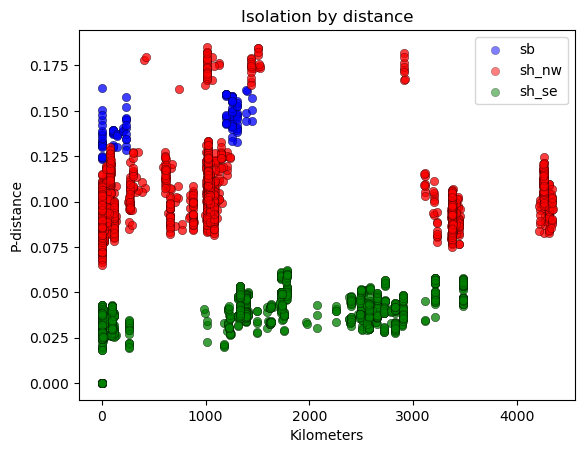

In [248]:
samples_with_geo_data = info_df.iloc[info_df['lat'].notnull().values]["sample_name"].values

for idx, color, label in [(sb_idx, "blue", "sb"),
                          (nw_idx, "red", "sh_nw"),
                          (se_idx, "green", "sh_se") ]:
    
    #subsample genetic and physical distance matricies
    g=gen_df.iloc[idx, idx]
    k=km_df.iloc[idx, idx]

    # #get rid of anything that didn't have lat lon
    # mask=k.index.isin(samples_with_geo_data)
    # g=g.loc[mask, mask]
    # k=k.loc[mask, mask]

    #conduct the mantel test
    r2, p, n = mantel(g, k, permutations=1000)
    print("Mantel test - {}: r2={:.2f}, p={:.3f}, n={}".format(label, r2, p, n))
    #add points to scatter plot
    gs=g.values.flatten()
    ks=k.values.flatten()
    plt.scatter(ks, gs, alpha=0.5, color=color, edgecolors="black", linewidth=0.3, label=label)

    
plt.legend()
plt.title("Isolation by distance")
plt.xlabel("Kilometers")
plt.ylabel("P-distance")
plt.show()

# Clines

In [6]:
Path("{}/clines".format(results_dir)).mkdir(parents=True, exist_ok=True)
os.chdir("{}/clines".format(results_dir))

In [7]:
#read in sample info
info_df=pd.read_csv("{}/data/seq_and_sample_docs/all_sh_sb_sample_data.csv".format(proj_dir), sep=",") 

#get the pca kmeans groups
pca_df=pd.read_csv("{}/results/pca/pca_df.csv".format(proj_dir), sep=",")
pca_df=pca_df[["sample_name", "kmeans_group", "kmeans_label"]]

#add to the sample info
info_df=info_df.merge(pca_df, how='right', on='sample_name')

In [8]:
#samples with no lat/lon info cause major problems will need to exclude downstream
sh_nw_samples = info_df.dropna(axis=0, subset=["lat", "lon"]).loc[info_df["kmeans_label"] == "sh_nw", "sample_name" ].values
sh_se_samples = info_df.dropna(axis=0, subset=["lat", "lon"]).loc[info_df["kmeans_label"] == "sh_se", "sample_name" ].values
sb_samples    = info_df.dropna(axis=0, subset=["lat", "lon"]).loc[info_df["kmeans_label"] == "sb", "sample_name" ].values

np.savetxt("sh_nw_samples.list", sh_nw_samples, delimiter=',', fmt="%s")
np.savetxt("sh_se_samples.list", sh_se_samples, delimiter=',', fmt="%s")
np.savetxt("sb_samples.list", sb_samples, delimiter=',', fmt="%s")

In [10]:
%%bash

cat sh_nw_samples.list  sh_se_samples.list >sh_samples.list

conda run -n scan-clines --cwd . --live-stream \
    vcftools \
        --vcf ../filter_genotypes/sorted_annotated_snps.vcf \
        --maf 0.05 \
        --keep sh_samples.list \
        --recode \
        --recode-INFO-all \
        --stdout \
        >maf05_sh.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../filter_genotypes/sorted_annotated_snps.vcf
	--keep sh_samples.list
	--recode-INFO-all
	--maf 0.05
	--recode
	--stdout

Keeping individuals in 'keep' list
After filtering, kept 121 out of 171 Individuals
Outputting VCF file...
After filtering, kept 2742535 out of a possible 38198427 Sites
Run Time = 1740.00 seconds


In [18]:
%%bash

cat sh_nw_samples.list  sh_se_samples.list >sh_samples.list

conda run -n scan-clines --cwd . --live-stream \
    vcftools \
        --vcf maf05_sh.vcf \
        --max-missing 0.9 \
        --recode \
        --recode-INFO-all \
        --stdout \
        >high_gt.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf maf05_sh.vcf
	--recode-INFO-all
	--max-missing 0.9
	--recode
	--stdout

After filtering, kept 121 out of 121 Individuals
Outputting VCF file...
After filtering, kept 1106586 out of a possible 2742535 Sites
Run Time = 410.00 seconds


In [19]:
%%bash 

#now get fsts
conda run -n scan-clines --cwd . --live-stream \
    vcftools \
        --vcf high_gt.vcf \
        --weir-fst-pop  sh_nw_samples.list \
        --weir-fst-pop  sh_se_samples.list


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf high_gt.vcf
	--weir-fst-pop sh_nw_samples.list
	--weir-fst-pop sh_se_samples.list
	--keep sh_nw_samples.list
	--keep sh_se_samples.list

Keeping individuals in 'keep' list
After filtering, kept 121 out of 121 Individuals
Outputting Weir and Cockerham Fst estimates.
Weir and Cockerham mean Fst estimate: 0.14823
Weir and Cockerham weighted Fst estimate: 0.20749
After filtering, kept 1106586 out of a possible 1106586 Sites
Run Time = 21.00 seconds


In [20]:
fst_df = pd.read_csv("out.weir.fst", sep="\t", header=0)

,CHROM,POS,WEIR_AND_COCKERHAM_FST
0,NC_067195.1,14316,0.001501
1,NC_067195.1,15207,0.142441
2,NC_067195.1,15260,0.101784
3,NC_067195.1,15333,0.029687
4,NC_067195.1,15387,0.071828
...,...,...,...
1106581,NW_026137003.1,87370,-0.004856
1106582,NW_026137003.1,87375,-0.000605
1106583,NW_026137003.1,87377,-0.007977
1106584,NW_026137003.1,87383,-0.001167


In [25]:
fst_df.loc[fst_df["WEIR_AND_COCKERHAM_FST"]>0.95, ["CHROM", "POS"]].to_csv("high_fst_sites.list", sep="\t", header=False, index=False)


In [27]:
%%bash

conda run -n scan-clines --cwd . --live-stream \
    vcftools \
        --vcf high_gt.vcf \
        --positions high_fst_sites.list \
        --recode \
        --recode-INFO-all


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf high_gt.vcf
	--recode-INFO-all
	--positions high_fst_sites.list
	--recode

After filtering, kept 121 out of 121 Individuals
Outputting VCF file...
After filtering, kept 1364 out of a possible 1106586 Sites
Run Time = 5.00 seconds


In [28]:
#read this in with scikit-allele and get af for both pops
filtered_callset=allel.read_vcf('out.recode.vcf')

In [29]:
#get relevant info
gt      = allel.GenotypeArray(filtered_callset['calldata/GT'])
chroms  = filtered_callset["variants/CHROM"]
samples = filtered_callset["samples"]
poss    = filtered_callset["variants/POS"]
var_ids = filtered_callset["variants/ID"]

uniq_chroms=np.unique(chroms)

In [36]:
#get pop idxs
pop_idxs = {}
pop_acs  = {}

for pop in ["sh_se", "sh_nw"]:
    
    df = pd.read_csv(f"{pop}_samples.list", header=None)

    # Convert the 'name' column into a list
    names = df[0].tolist()

    #find indecies for each sample from that species
    pop_idxs[pop]=np.in1d(samples, names).nonzero()[0]

    #get allele counts for each species
    pop_acs[pop] = gt.count_alleles(subpop=pop_idxs[pop])

In [42]:
se_af = pop_acs["sh_se"].to_frequencies()[:, 0]

array([0.02325581, 0.0326087 , 0.03191489, ..., 0.0326087 , 0.05319149,
       0.02083333])

In [44]:
nw_af = pop_acs["sh_nw"].to_frequencies()[:, 0]

# Clines


In [314]:
Path("{}/clines".format(results_dir)).mkdir(parents=True, exist_ok=True)
os.chdir("{}/clines".format(results_dir))

In [320]:
pca_df=pd.read_csv("{}/pca/pca_df.csv".format(results_dir), sep=",")
cline_df = pca_df[["sample_name", "country", "locale", "host", "lat", "lon", "kmeans_label", "pca_species"]]
cline_df

,sample_name,country,locale,host,lat,lon,kmeans_label,pca_species
0,Sb_NG_au_1.2,nigeria,na,cow,7.067448,6.271139,sb,s_bovis
1,Sb_NG_au_2.10,nigeria,na,cow,7.067448,6.271139,sb,s_bovis
2,Sb_NG_au_2.13,nigeria,na,cow,7.067448,6.271139,sb,s_bovis
3,Sb_NG_au_2.5,nigeria,na,cow,7.067448,6.271139,sb,s_bovis
4,Sb_NG_au_2.6,nigeria,na,cow,7.067448,6.271139,sb,s_bovis
...,...,...,...,...,...,...,...,...
161,ssp_niger_libore_166,niger,na,snail,13.388050,2.199130,sh_nw,s_haematobium
162,ssp_niger_libore_167,niger,na,snail,13.390080,2.197110,sh_nw,s_haematobium
163,ssp_niger_libore_168,niger,na,snail,13.390080,2.197110,sh_nw,s_haematobium
164,ssp_niger_libore_169,niger,na,snail,13.404170,2.188020,sh_nw,s_haematobium


## make kriging map

In [321]:
samples=[]
with open("../admixture/samples.list", 'r') as f:
    samples = f.read().splitlines()

k=3
adm_df=pd.read_csv("../admixture/adm.{}.Q".format(k), sep=" ", header=None)
adm_df["sample_name"]=samples
adm_df.rename({0: "adm0", 1: "adm1", 2: "adm2"}, axis=1, inplace=True)
adm_df

cline_df = adm_df.merge(cline_df, how='left', on='sample_name')

cline_df = cline_df[cline_df["lat"].notnull()]
cline_df = cline_df[cline_df["lon"].notnull()]

cline_df = cline_df.loc[cline_df["pca_species"] == "s_haematobium"]

cline_df.reset_index(drop=True, inplace=True)

cline_df.to_csv("cline_adm{}.csv".format(k), sep=",", index=None)
cline_df

,adm0,adm1,adm2,sample_name,country,locale,host,lat,lon,kmeans_label,pca_species
0,0.035980,0.753328,0.210692,Sh_NG_eb_6_2,nigeria,ebonyi,human,6.328611,8.082222,sh_nw,s_haematobium
1,0.015545,0.961096,0.023359,Sh_NG_kb_2_1,nigeria,kebbi,human,11.710000,4.052222,sh_nw,s_haematobium
2,0.022445,0.920098,0.057457,Sh_NG_kw_1_10,nigeria,kwara,human,8.892222,5.451389,sh_nw,s_haematobium
3,0.055559,0.944431,0.000010,Sh_NG_os_1_4,nigeria,osun,human,7.963889,4.563889,sh_nw,s_haematobium
4,0.025241,0.959973,0.014786,sbo_cdivoire_raviart_108,cote_d_ivoire,na,snail,7.400372,-4.896099,sh_nw,s_haematobium
...,...,...,...,...,...,...,...,...,...,...,...
114,0.000010,0.999980,0.000010,ssp_niger_libore_166,niger,na,snail,13.388050,2.199130,sh_nw,s_haematobium
115,0.000010,0.999980,0.000010,ssp_niger_libore_167,niger,na,snail,13.390080,2.197110,sh_nw,s_haematobium
116,0.000010,0.999980,0.000010,ssp_niger_libore_168,niger,na,snail,13.390080,2.197110,sh_nw,s_haematobium
117,0.020853,0.979137,0.000010,ssp_niger_libore_169,niger,na,snail,13.404170,2.188020,sh_nw,s_haematobium


In [309]:
# plt.xlim([-15, 55])
# plt.ylim([-35, 20])

min_lat = cline_df["lat"].min()
max_lat = cline_df["lat"].max()
min_lon = cline_df["lon"].min()
max_lon = cline_df["lon"].max()


min_lat = -35
max_lat = 20
min_lon = -15
max_lon = 55

In [322]:
cline_df

,adm0,adm1,adm2,sample_name,country,locale,host,lat,lon,kmeans_label,pca_species
0,0.035980,0.753328,0.210692,Sh_NG_eb_6_2,nigeria,ebonyi,human,6.328611,8.082222,sh_nw,s_haematobium
1,0.015545,0.961096,0.023359,Sh_NG_kb_2_1,nigeria,kebbi,human,11.710000,4.052222,sh_nw,s_haematobium
2,0.022445,0.920098,0.057457,Sh_NG_kw_1_10,nigeria,kwara,human,8.892222,5.451389,sh_nw,s_haematobium
3,0.055559,0.944431,0.000010,Sh_NG_os_1_4,nigeria,osun,human,7.963889,4.563889,sh_nw,s_haematobium
4,0.025241,0.959973,0.014786,sbo_cdivoire_raviart_108,cote_d_ivoire,na,snail,7.400372,-4.896099,sh_nw,s_haematobium
...,...,...,...,...,...,...,...,...,...,...,...
114,0.000010,0.999980,0.000010,ssp_niger_libore_166,niger,na,snail,13.388050,2.199130,sh_nw,s_haematobium
115,0.000010,0.999980,0.000010,ssp_niger_libore_167,niger,na,snail,13.390080,2.197110,sh_nw,s_haematobium
116,0.000010,0.999980,0.000010,ssp_niger_libore_168,niger,na,snail,13.390080,2.197110,sh_nw,s_haematobium
117,0.020853,0.979137,0.000010,ssp_niger_libore_169,niger,na,snail,13.404170,2.188020,sh_nw,s_haematobium


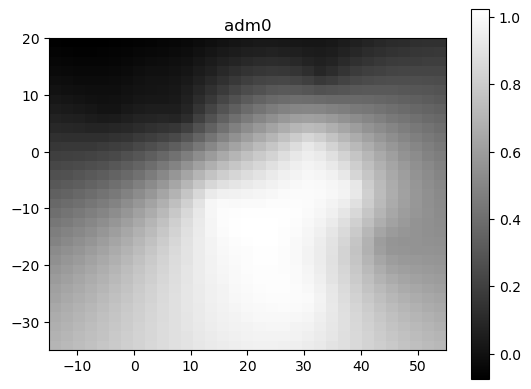

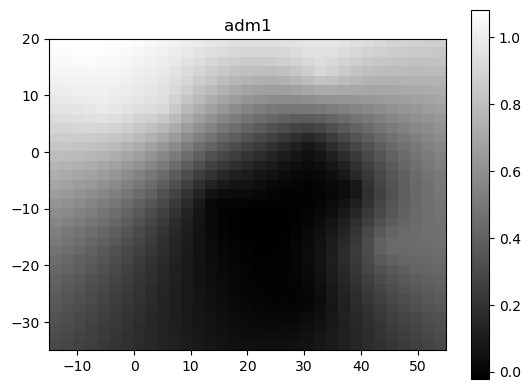

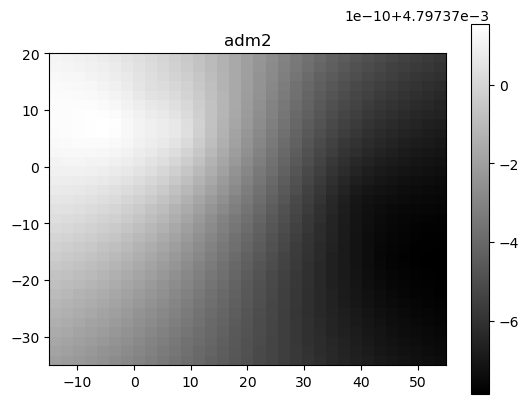

In [323]:
#from https://geostat-framework.readthedocs.io/_/downloads/pykrige/en/stable/pdf/

adm_cs={}
for adm_c in [0, 1, 2]:
    
    lon = cline_df["lon"]
    lat = cline_df["lat"]
    z = cline_df["adm{}".format(str(adm_c))]

    # Generate a regular grid with 60° longitude and 30° latitude steps:
    grid_lon = np.linspace(min_lon, max_lon, 33)
    grid_lat = np.linspace(min_lat, max_lat, 33)
    # Create ordinary kriging object:

    OK = OrdinaryKriging(
        lon,
        lat,
        z,
        variogram_model="linear",
        verbose=False,
        enable_plotting=False,
        coordinates_type="geographic",
        )

    # Execute on grid:
    adm_cs[adm_c], ss1 = OK.execute("grid", grid_lon, grid_lat)

    plt.imshow(adm_cs[adm_c], extent=[min_lon, max_lon
                                      , min_lat, max_lat], cmap='gray', origin="lower")
    plt.colorbar()
    plt.title("adm{}".format(str(adm_c)))
    plt.show()


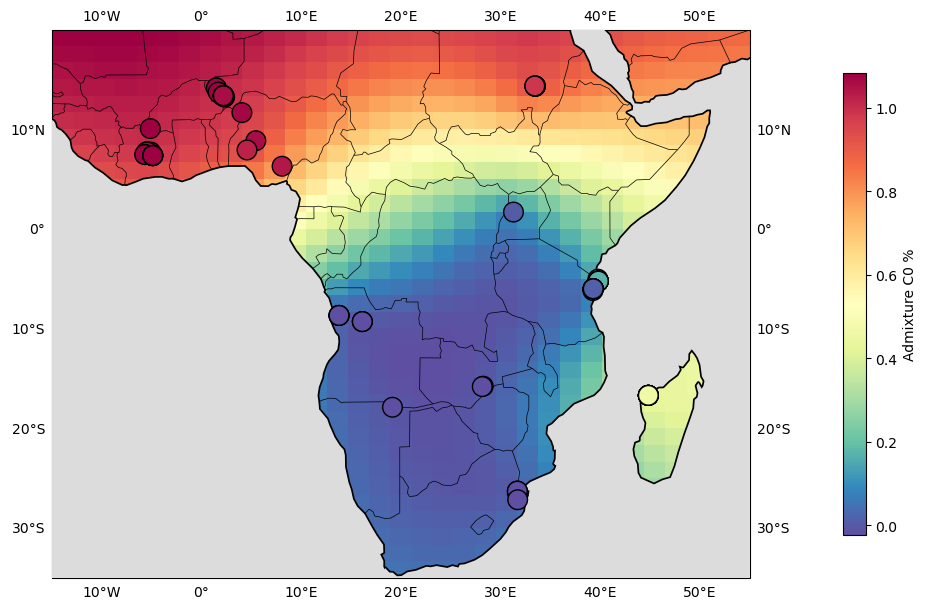

In [325]:
figure(figsize=(12, 12))

ax = plt.axes(projection=ccrs.PlateCarree())


plt.scatter(cline_df["lon"], cline_df["lat"],
         c=-cline_df["adm0"], cmap='Spectral_r', marker='o', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

plt.imshow(adm_cs[1], extent=(min_lon, max_lon, min_lat, max_lat), cmap='Spectral_r', origin="lower", zorder=1)
plt.colorbar(shrink=0.5, pad=0.1, label="Admixture C0 %")

ax.add_feature(cf.OCEAN, facecolor='gainsboro', zorder=4)

ax.coastlines(zorder=2, linewidth=2.5)
ax.add_feature(cf.BORDERS, edgecolor='black', zorder=4, linewidth=0.5)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, zorder=5, color="white", alpha=0)


plt.xlim([-15, 55])
plt.ylim([-35, 20])

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('kigring_map.png', dpi=300)
plt.savefig('kigring_map.svg')


plt.show()

In [135]:
sh_cline_df.country.unique()

array(['nigeria', 'cote_d_ivoire', 'niger', 'uganda', 'zanzibar',
       'angola', 'madagascar', 'namibia', 'sudan', 'swaziland', 'zambia'],
      dtype=object)

## distances between samples

In [25]:
sh_cline_df = cline_df.loc[((cline_df["kmeans_label"] == "sh_nw") | (cline_df["kmeans_label"] == "sh_se"))].dropna(subset=['lat', 'lon'])

kms = np.array([])
s1s = np.array([])
s2s = np.array([])

for s1 in tqdm(sh_cline_df["sample_name"]):
    s1_lat=cline_df.loc[cline_df["sample_name"] == s1]["lat"].values[0]
    s1_lon=cline_df.loc[cline_df["sample_name"] == s1]["lon"].values[0]
    
    for s2 in samples:
        s2_lat=cline_df.loc[cline_df["sample_name"] == s2]["lat"].values[0]
        s2_lon=cline_df.loc[cline_df["sample_name"] == s2]["lon"].values[0]
        
        kms=np.append(kms, haversine((s1_lat, s1_lon), (s2_lat, s2_lon)))
        s1s=np.append(s1s, s1)
        s2s=np.append(s2s, s2)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:19<00:00,  6.05it/s]


In [26]:
km_df = pd.DataFrame([s1s, s2s, kms]).T
km_df.columns=["s1", "s2", "km"]
km_df.sort_values("km", ascending=False, axis=0).dropna().head()

,s1,s2,km
16843,ssp_cdivoire_noumousso_94,sha_madag_belesalampy_80,6250.452986
16842,ssp_cdivoire_noumousso_94,sha_madag_belesalampy_78,6250.452986
6786,sha_madag_belesalampy_76,ssp_cdivoire_noumousso_94,6250.452986
6288,sha_madag_belesalampy_73,ssp_cdivoire_noumousso_94,6250.452986
6952,sha_madag_belesalampy_77,ssp_cdivoire_noumousso_94,6250.452986


reps from two most distant sites
 - sha_madag_belesalampy_80
 - ssp_cdivoire_noumousso_94

In [27]:
sh_cline_df.loc[sh_cline_df["sample_name"] == "sha_madag_belesalampy_80"]

,adm0,adm1,adm2,sample_name,country,locale,host,lat,lon,kmeans_label
77,0.569843,0.00001,0.430147,sha_madag_belesalampy_80,madagascar,na,human,-16.6646,44.84056,sh_se


In [28]:
sh_cline_df.loc[sh_cline_df["sample_name"] == "ssp_cdivoire_noumousso_94"]

,adm0,adm1,adm2,sample_name,country,locale,host,lat,lon,kmeans_label
146,0.012478,0.00001,0.987512,ssp_cdivoire_noumousso_94,cote_d_ivoire,na,snail,10.107108,-5.142159,sh_nw


In [127]:
sh_cline_df.sort_values(by=["lat", "lon"], ascending=[False, False]).head(n=10)

,adm0,adm1,adm2,sample_name,country,locale,host,lat,lon,kmeans_label,dist_from_ref
109,0.060901,0.00001,0.939089,sha_sudan_schoole_120,sudan,na,snail,14.386818,33.509815,sh_nw,4222.131919
111,0.099762,0.00001,0.900228,sha_sudan_schooli_129,sudan,na,snail,14.384994,33.445852,sh_nw,4215.23966
112,0.060267,0.00001,0.939723,sha_sudan_schooli_130,sudan,na,snail,14.384994,33.445852,sh_nw,4215.23966
110,0.137126,0.00001,0.862864,sha_sudan_schoolh_123,sudan,na,snail,14.373361,33.479290,sh_nw,4218.794875
105,0.098949,0.00001,0.901041,sha_sudan_canal4_125,sudan,na,snail,14.362360,33.487493,sh_nw,4219.636484
106,0.102089,0.00001,0.897901,sha_sudan_canal4_126,sudan,na,snail,14.362360,33.487493,sh_nw,4219.636484
107,0.056686,0.00001,0.943304,sha_sudan_canal4_127,sudan,na,snail,14.362360,33.487493,sh_nw,4219.636484
108,0.067311,0.00001,0.932679,sha_sudan_canal4_132,sudan,na,snail,14.362360,33.487493,sh_nw,4219.636484
46,0.013577,0.00001,0.986413,sh_niger_SRR8284786,niger,na,human,14.187521,1.486310,sh_nw,851.340532
47,0.000010,0.00001,0.999980,sh_niger_SRR8284787,niger,na,human,14.187521,1.486310,sh_nw,851.340532


In [128]:
sh_cline_df.sort_values(by=["lat", "lon"], ascending=[False, False]).tail(n=10)

,adm0,adm1,adm2,sample_name,country,locale,host,lat,lon,kmeans_label,dist_from_ref
78,0.599515,0.00001,0.400475,sha_madag_belesalampy_81,madagascar,na,human,-16.664600,44.840560,sh_se,6250.452986
79,0.577123,0.00001,0.422867,sha_madag_belesalampy_82,madagascar,na,human,-16.664600,44.840560,sh_se,6250.452986
80,0.553578,0.00001,0.446412,sha_madag_belesalampy_83,madagascar,na,human,-16.664600,44.840560,sh_se,6250.452986
81,0.617950,0.00001,0.382040,sha_madag_belesalampy_84,madagascar,na,human,-16.664600,44.840560,sh_se,6250.452986
82,0.594832,0.00001,0.405158,sha_madag_belesalampy_87,madagascar,na,human,-16.664600,44.840560,sh_se,6250.452986
83,0.999980,0.00001,0.000010,sha_namib_mayenzere_134,namibia,na,human,-17.858400,19.159700,sh_se,4097.645177
119,0.999980,0.00001,0.000010,sha_swaz_njojane_188,swaziland,na,unk,-26.277583,31.699567,sh_se,5675.511528
120,0.999980,0.00001,0.000010,sha_swaz_njojane_190,swaziland,na,unk,-26.277583,31.699567,sh_se,5675.511528
121,0.999980,0.00001,0.000010,sha_swaz_njojane_191,swaziland,na,unk,-26.277583,31.699567,sh_se,5675.511528
122,0.999980,0.00001,0.000010,sha_swaz_qomintaba_185,swaziland,na,unk,-27.138917,31.728250,sh_se,5740.324876


In [30]:
sh_niger_SRR8284786, sha_swaz_qomintaba_185

,adm0,adm1,adm2,sample_name,country,locale,host,lat,lon,kmeans_label
109,0.060901,0.00001,0.939089,sha_sudan_schoole_120,sudan,na,snail,14.386818,33.509815,sh_nw
111,0.099762,0.00001,0.900228,sha_sudan_schooli_129,sudan,na,snail,14.384994,33.445852,sh_nw
112,0.060267,0.00001,0.939723,sha_sudan_schooli_130,sudan,na,snail,14.384994,33.445852,sh_nw
110,0.137126,0.00001,0.862864,sha_sudan_schoolh_123,sudan,na,snail,14.373361,33.479290,sh_nw
106,0.102089,0.00001,0.897901,sha_sudan_canal4_126,sudan,na,snail,14.362360,33.487493,sh_nw
...,...,...,...,...,...,...,...,...,...,...
83,0.999980,0.00001,0.000010,sha_namib_mayenzere_134,namibia,na,human,-17.858400,19.159700,sh_se
121,0.999980,0.00001,0.000010,sha_swaz_njojane_191,swaziland,na,unk,-26.277583,31.699567,sh_se
120,0.999980,0.00001,0.000010,sha_swaz_njojane_190,swaziland,na,unk,-26.277583,31.699567,sh_se
119,0.999980,0.00001,0.000010,sha_swaz_njojane_188,swaziland,na,unk,-26.277583,31.699567,sh_se


In [129]:
ref = "sh_niger_SRR8284786"

sh_cline_df["dist_from_ref"]="NA"

s1_lat=sh_cline_df.loc[sh_cline_df["sample_name"] == ref]["lat"].values[0]
s1_lon=sh_cline_df.loc[sh_cline_df["sample_name"] == ref]["lon"].values[0]

kms=[]

for index, row in tqdm(sh_cline_df.iterrows()):
    sample_id = row["sample_name"]
    s2_lat=sh_cline_df.loc[sh_cline_df["sample_name"] == sample_id]["lat"].values[0]
    s2_lon=sh_cline_df.loc[sh_cline_df["sample_name"] == sample_id]["lon"].values[0]

    km = haversine((s1_lat, s1_lon), (s2_lat, s2_lon))
    sh_cline_df.loc[sh_cline_df["sample_name"] == sample_id, "dist_from_ref"] = km


sh_cline_df

121it [00:00, 1429.99it/s]


,adm0,adm1,adm2,sample_name,country,locale,host,lat,lon,kmeans_label,dist_from_ref
9,0.037610,0.221418,0.740972,Sh_NG_eb_6_2,nigeria,ebonyi,human,6.328611,8.082222,sh_nw,1132.961356
12,0.000010,0.015103,0.984887,Sh_NG_kb_2_1,nigeria,kebbi,human,11.710000,4.052222,sh_nw,391.404253
13,0.000010,0.055020,0.944970,Sh_NG_kw_1_10,nigeria,kwara,human,8.892222,5.451389,sh_nw,730.176092
14,0.018892,0.000010,0.981098,Sh_NG_os_1_4,nigeria,osun,human,7.963889,4.563889,sh_nw,769.141006
25,0.026561,0.012619,0.960820,sbo_cdivoire_raviart_108,cote_d_ivoire,na,snail,7.400372,-4.896099,sh_nw,1027.092362
...,...,...,...,...,...,...,...,...,...,...,...
161,0.011096,0.000010,0.988894,ssp_niger_libore_167,niger,na,snail,13.390080,2.197110,sh_nw,117.279903
162,0.009580,0.000010,0.990410,ssp_niger_libore_168,niger,na,snail,13.390080,2.197110,sh_nw,117.279903
163,0.012746,0.000010,0.987244,ssp_niger_libore_169,niger,na,snail,13.404170,2.188020,sh_nw,115.451739
164,0.000010,0.000010,0.999980,ssp_niger_libore_173,niger,na,snail,13.404170,2.188020,sh_nw,115.451739


121it [00:00, 1077.26it/s]


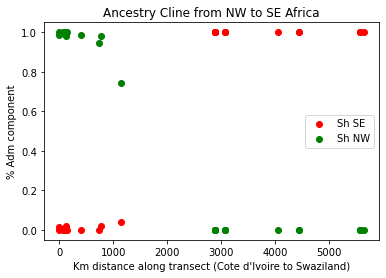

In [146]:
ref = "sh_niger_SRR8284786"

sh_cline_df["dist_from_ref"]="NA"

s1_lat=sh_cline_df.loc[sh_cline_df["sample_name"] == ref]["lat"].values[0]
s1_lon=sh_cline_df.loc[sh_cline_df["sample_name"] == ref]["lon"].values[0]

kms=[]

for index, row in tqdm(sh_cline_df.iterrows()):
    sample_id = row["sample_name"]
    s2_lat=sh_cline_df.loc[sh_cline_df["sample_name"] == sample_id]["lat"].values[0]
    s2_lon=sh_cline_df.loc[sh_cline_df["sample_name"] == sample_id]["lon"].values[0]

    km = haversine((s1_lat, s1_lon), (s2_lat, s2_lon))
    sh_cline_df.loc[sh_cline_df["sample_name"] == sample_id, "dist_from_ref"] = km

    
tmp_df = sh_cline_df[sh_cline_df['country'].isin(["niger", "nigeria", "angola", "zambia", "namibia", "swaziland"])]
x=tmp_df["dist_from_ref"]
adm0_y=tmp_df["adm0"]
adm1_y=tmp_df["adm1"]
adm2_y=tmp_df["adm2"]

plt.scatter(x, adm0_y, c="red", label="Sh SE")
plt.scatter(x, adm2_y, c="green", label="Sh NW")
plt.xlabel("Km distance along transect (Cote d'Ivoire to Swaziland)")
plt.ylabel("% Adm component")
plt.title("Ancestry Cline from NW to SE Africa")
plt.legend()
plt.show()

tmp_df["sample_name"].to_csv("NW_SE_transect.samples", sep=",", index=None, header=None)

In [145]:
! head NW_SE_cline.samples

Sh_NG_eb_6_2
Sh_NG_kb_2_1
Sh_NG_kw_1_10
Sh_NG_os_1_4
sbo_niger_libore_154
sbo_niger_libore_155
sbo_niger_libore_160
sbo_niger_libore_162
sbo_niger_libore_163
sbo_niger_libore_164


121it [00:00, 1542.23it/s]


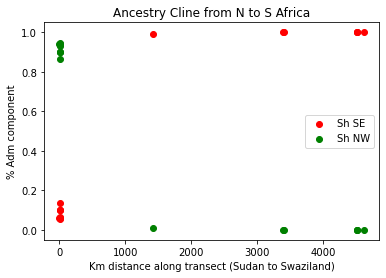

In [148]:
ref = "sha_sudan_schoole_120"

sh_cline_df["dist_from_ref"]="NA"

s1_lat=sh_cline_df.loc[sh_cline_df["sample_name"] == ref]["lat"].values[0]
s1_lon=sh_cline_df.loc[sh_cline_df["sample_name"] == ref]["lon"].values[0]

kms=[]

for index, row in tqdm(sh_cline_df.iterrows()):
    sample_id = row["sample_name"]
    s2_lat=sh_cline_df.loc[sh_cline_df["sample_name"] == sample_id]["lat"].values[0]
    s2_lon=sh_cline_df.loc[sh_cline_df["sample_name"] == sample_id]["lon"].values[0]

    km = haversine((s1_lat, s1_lon), (s2_lat, s2_lon))
    sh_cline_df.loc[sh_cline_df["sample_name"] == sample_id, "dist_from_ref"] = km
    
tmp_df = sh_cline_df[sh_cline_df['country'].isin(["sudan", "uganda", "zambia", "swaziland"])]
x=tmp_df["dist_from_ref"]
adm0_y=tmp_df["adm0"]
adm1_y=tmp_df["adm1"]
adm2_y=tmp_df["adm2"]

plt.scatter(x, adm0_y, c="red", label="Sh SE")
plt.scatter(x, adm2_y, c="green", label="Sh NW")
plt.xlabel("Km distance along transect (Sudan to Swaziland)")
plt.ylabel("% Adm component")
plt.title("Ancestry Cline from N to S Africa")
plt.legend()
plt.show()

tmp_df["sample_name"].to_csv("N_S_transect.samples", sep=",", index=None, header=None)

## clines

In [150]:
#read in the vcf file
filtered_callset=allel.read_vcf('../filter_genotypes/maf05.vcf')

#get relevant info
gt      = allel.GenotypeArray(filtered_callset['calldata/GT'])
chroms  = filtered_callset["variants/CHROM"]
samples = filtered_callset["samples"]
poss    = filtered_callset["variants/POS"]
var_ids = filtered_callset["variants/ID"]

uniq_chroms=np.unique(chroms)

In [151]:
#now get species/country idexs
sp_country_idxs = defaultdict(lambda: {})
sp_country_acs  = defaultdict(lambda: {})

for sp in tqdm(["s_bovis", "s_haematobium"]):
    sp_countries = pca_df.loc[ pca_df["pca_species"] == sp]["country"].astype(str).unique()
    
    for country in sp_countries:
        sp_country_idxs[sp][country] = list(pca_df.loc[ (pca_df["pca_species"] == sp) &  (pca_df["country"] == country)].index)
        #if len(sp_country_idxs[sp][country]) > 1:

        #get allele counts for each species
        sp_country_acs[sp][country] = gt.count_alleles(subpop=sp_country_idxs[sp][country])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:00<00:00, 30.32s/it]


Get high fst snps along a transect

In [152]:
s1=sp_country_idxs["s_haematobium"]["niger"]
s2=sp_country_idxs["s_haematobium"]["swaziland"]

c1, c2, c3 = allel.weir_cockerham_fst(gt, [s1, s2])

fsts=c1/(c1+c2+c3)

/master/nplatt/anaconda3/envs/popstructure/lib/python3.9/site-packages/allel/stats/fst.py:184: RuntimeWarning: invalid value encountered in true_divide
  p = ac / an[:, np.newaxis, :]
/master/nplatt/anaconda3/envs/popstructure/lib/python3.9/site-packages/allel/stats/fst.py:225: RuntimeWarning: divide by zero encountered in true_divide
  a = ((n_bar / n_C) *
/tmp/ipykernel_35651/3381524001.py:6: RuntimeWarning: invalid value encountered in true_divide
  fsts=c1/(c1+c2+c3)


In [153]:
fsts = (np.sum(c1, axis=1) / (np.sum(c1, axis=1) + np.sum(c2, axis=1) + np.sum(c3, axis=1)))

/tmp/ipykernel_35651/1691969255.py:1: RuntimeWarning: invalid value encountered in true_divide
  fsts = (np.sum(c1, axis=1) / (np.sum(c1, axis=1) + np.sum(c2, axis=1) + np.sum(c3, axis=1)))


In [154]:
fst_mask=(fsts >0.5)

high_fst_snvs=[]
for chrom, pos in zip(chroms[fst_mask], poss[fst_mask]):
    high_fst_snvs.append("{}:{}".format(chrom, pos))
    
    
pd.Series(high_fst_snvs).to_csv("high_fst_snvs.list", sep=",", index=None, header=None)

In [155]:
! head high_fst_snvs.list

HiC_scaffold_1:155076
HiC_scaffold_1:292678
HiC_scaffold_1:293192
HiC_scaffold_1:293406
HiC_scaffold_1:296530
HiC_scaffold_1:296533
HiC_scaffold_1:296547
HiC_scaffold_1:311260
HiC_scaffold_1:311300
HiC_scaffold_1:332747


In [ ]:
%%bash 

vcftools \
    --vcf ../filter_genotypes/maf05.vcf \
    --snps high_fst_snvs.list \
    --keep NW_SE_transect.samples \
    --recode \
    --recode-INFO-all \
    --stdout \
    >high_fst_snvs_NW_SE.vcf

In [ ]:
%%bash 

plink \
    --vcf high_fst_snvs_NW_SE.vcf \
    --allow-extra-chr \
    --double-id \
    --indep-pairwise 25 5 0.20 \
    --out high_fst_snvs_NW_SE_ld

vcftools \
    --vcf high_fst_snvs_NW_SE.vcf \
    --exclude maf05_ld_filtered.prune.out \
    --recode \
    --recode-INFO-all \
    --stdout \
    >high_fst_snvs_NW_SE_ld.vcf

vcftools \
    --vcf high_fst_snvs_NW_SE.vcf \
    --thin 10000 \
    --recode \
    --recode-INFO-all \
    --stdout \
    >high_fst_snvs_NW_SE_ld_thinned.vcf

In [ ]:
populations  \
    -V 'high_fst_snvs.vcf' \
    -M 'mypopmap.tsv' \
    --hzar \


In [158]:
%%R
library(hzar)
d<-read.delim("hzar/high_fst_snvs.p.hzar.csv", sep=",")
    

UsageError: Cell magic `%%R` not found.


In [391]:
%%R
library(hzar)

UsageError: Cell magic `%%R` not found.


In [392]:
#read in the vcf file
cline_callset=allel.read_vcf('high_fst_snvs.vcf')

#get relevant info
cgt      = allel.GenotypeArray(cline_callset['calldata/GT'])
cchroms  = cline_callset["variants/CHROM"]
csamples = cline_callset["samples"]
cposs    = cline_callset["variants/POS"]
cvar_ids = cline_callset["variants/ID"]

In [410]:
idx = int(pca_df.loc[pca_df["sample_name"] == sample].index[0])

9

In [428]:
list(csamples).index("sh_tzpem_SRR8284797")

37

In [451]:
#now get species/country idexs
country_idxs = defaultdict(lambda: [])
country_acs  = defaultdict(lambda: [])
rs = defaultdict(lambda: [])
for sample in tqdm(csamples):
    country = pca_df.loc[ pca_df["sample_name"] == sample, "country"].values[0]
    idx = list(csamples).index(sample)
    
    country_idxs[country].append(idx)
    
for country in tqdm(country_idxs.keys()):

    num_samples = len(country_idxs[country])
    if num_samples > 4:
        idxs = country_idxs[country]
        
        #get allele counts for each country
        country_acs[country] = cgt.count_alleles(subpop=idxs)

        rs[country] = country_acs[country].to_frequencies()[:,0]
    
# countries

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 90.71it/s]


In [453]:
country_acs.keys()

dict_keys(['nigeria', 'cote_d_ivoire', 'niger', 'zanzibar', 'angola', 'madagascar', 'sudan', 'swaziland'])

In [454]:
acs_df=pd.DataFrame([rs["nigeria"], rs['cote_d_ivoire'], 
                     rs['niger'],   rs['zanzibar'],  rs['angola'], 
                     rs['madagascar'], rs['sudan'], rs['swaziland'] ])
                    
    
    
acs_df=acs_df.T
acs_df.columns=['nigeria', 'cote_d_ivoire', 'niger', 'zanzibar', 'angola', 'madagascar', 'sudan', 'swaziland' ]    
    
acs_df
# plt.plot(rs["nigeria"], rs["swaziland"]])
# plt.show

,nigeria,cote_d_ivoire,niger,zanzibar,angola,madagascar,sudan,swaziland
0,0.916667,0.921053,0.965517,1.000000,1.000000,1.000000,0.5,1.000000
1,1.000000,1.000000,1.000000,0.250000,0.300000,0.250000,1.0,0.285714
2,0.833333,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.125000
3,1.000000,1.000000,1.000000,0.815789,0.600000,0.772727,1.0,0.500000
4,0.928571,0.958333,1.000000,0.022727,0.071429,0.000000,1.0,0.055556
...,...,...,...,...,...,...,...,...
77736,1.000000,1.000000,1.000000,0.500000,0.500000,0.714286,1.0,0.545455
77737,1.000000,1.000000,1.000000,0.552632,0.562500,0.666667,1.0,0.416667
77738,1.000000,1.000000,1.000000,0.473684,0.500000,0.500000,1.0,0.416667
77739,1.000000,1.000000,1.000000,0.473684,0.500000,0.583333,1.0,0.416667


In [465]:
delta_p = abs(acs_df["nigeria"] - acs_df["swaziland"])
delta_df = acs_df[(delta_p>0.5)]



In [466]:
delta_df

,nigeria,cote_d_ivoire,niger,zanzibar,angola,madagascar,sudan,swaziland
1,1.000000,1.000000,1.000000,0.250000,0.300000,0.250000,1.00,0.285714
2,0.833333,1.000000,1.000000,0.000000,0.000000,0.000000,1.00,0.125000
4,0.928571,0.958333,1.000000,0.022727,0.071429,0.000000,1.00,0.055556
5,0.928571,0.958333,1.000000,0.022727,0.071429,0.000000,1.00,0.055556
6,0.928571,0.958333,1.000000,0.022727,0.071429,0.000000,1.00,0.055556
...,...,...,...,...,...,...,...,...
77729,0.000000,0.000000,0.016129,0.027778,0.000000,0.000000,0.25,0.750000
77737,1.000000,1.000000,1.000000,0.552632,0.562500,0.666667,1.00,0.416667
77738,1.000000,1.000000,1.000000,0.473684,0.500000,0.500000,1.00,0.416667
77739,1.000000,1.000000,1.000000,0.473684,0.500000,0.583333,1.00,0.416667
